<a href="https://colab.research.google.com/github/ArifAygun/CustomerEye/blob/main/Company_Reviews(Master2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### IMPORT LIBRARIES AND DATASET

In [80]:
!pip install vaderSentiment
!pip install emoji

In [81]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates

from wordcloud import WordCloud
from collections import Counter
import emoji

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [82]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Analysis_1/

# Read CSV files into DataFrames
df1 = pd.read_csv('Freedom_Debt_Relief2.csv')
df2 = pd.read_csv('Millennium_Trust2.csv')
df3 = pd.read_csv('Advance_America2.csv')

print(df1.info(), df1.head())
print(df2.info(), df2.head())
print(df3.info(), df3.head())

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Analysis_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             2000 non-null   float64
 1   Experience Date  2000 non-null   object 
 2   Review Date      2000 non-null   object 
 3   Reply Date       2000 non-null   object 
 4   Exp to Review    2000 non-null   int64  
 5   Review to Reply  2000 non-null   int64  
 6   Rating           2000 non-null   int64  
 7   Countries        2000 non-null   object 
 8   Reviews          2000 non-null   object 
 9   Replies          2000 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 156.4+ KB
None      Year Experience Date Review Date  Reply Date  Exp to Review  \
0  2021.0      2021-08-26  2021-08-26 

## TEXT PREPROCESSING

In [83]:
def preprocess_text_for_sentiment_analysis(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Handle emojis
    words = [emoji.demojize(word, delimiters=('', ' ')) for word in words]

    # Join tokens back into a string
    cleaned_text = ' '.join(words)

    return cleaned_text


# Apply the preprocessing function to the "Reviews" column in each DataFrame
df1['Cleaned_Reviews'] = df1['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df2['Cleaned_Reviews'] = df2['Reviews'].apply(preprocess_text_for_sentiment_analysis)
df3['Cleaned_Reviews'] = df3['Reviews'].apply(preprocess_text_for_sentiment_analysis)

# Display the cleaned data
print("Cleaned DataFrame 1:")
print(df1[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 2:")
print(df2[['Reviews', 'Cleaned_Reviews']].head())

print("\nCleaned DataFrame 3:")
print(df3[['Reviews', 'Cleaned_Reviews']].head())


Cleaned DataFrame 1:
                                             Reviews  \
0  Freedom Debt Relief helped me reduce my… Freed...   
1  Please read Freedom debt is an amazing,  they ...   
2  So far I cannot complain So far I cannot compl...   
3  Very clear explanation and very… Very clear ex...   
4  FDR is trustworthy FDR is honest and hardworki...   

                                     Cleaned_Reviews  
0  freedom debt relief helped reduce freedom debt...  
1  please read freedom debt amazing help remove d...  
2  far complain far complain account settlement f...  
3  clear explanation clear explanation pleasant p...  
4  fdr trustworthy fdr honest hardworking complet...  

Cleaned DataFrame 2:
                                             Reviews  \
0  The only issue I have is that it was… The only...   
1  The service was great The service was great. W...   
2                         Great customer service nan   
3  My experience was excellent customer… My exper...   
4         

## TEXT ITEM COUNTS

In [84]:
# Define a function to calculate and display text item counts
def calculate_and_display_text_item_counts(data, company):
    # Count the number of items in each text item
    data['Text_Item_Count'] = data['Cleaned_Reviews'].apply(lambda x: len(str(x).split()) if pd.notna(x) else 0)

    # Display both the text and the count of text items
    text_with_count = data[['Cleaned_Reviews', 'Text_Item_Count']]
    print(f"\nCleaned Data for {company}:")
    print(text_with_count)

    # Calculate the total number of text items across all rows
    total_text_items = data['Text_Item_Count'].sum()

    # Display the total number of text items
    print(f"Total Text Items for {company}: {total_text_items}")

# Apply the function to each DataFrame and company
calculate_and_display_text_item_counts(df1, 'Freedom Debt Relief')
calculate_and_display_text_item_counts(df2, 'Millennium Trust')
calculate_and_display_text_item_counts(df3, 'Advance America')



Cleaned Data for Freedom Debt Relief:
                                        Cleaned_Reviews  Text_Item_Count
0     freedom debt relief helped reduce freedom debt...               17
1     please read freedom debt amazing help remove d...               17
2     far complain far complain account settlement f...               17
3     clear explanation clear explanation pleasant p...                6
4     fdr trustworthy fdr honest hardworking complet...               10
...                                                 ...              ...
1995  helpful knowledgeable staff helpful knowledgea...               17
1996                        review knew job gave answer                5
1997  thing make experience thing make experience fr...               29
1998  slowly going goal debt slowly going goal debt ...                9
1999  since wife joined fdr since wife joined fdr no...               24

[2000 rows x 2 columns]
Total Text Items for Freedom Debt Relief: 37018

Cleaned Dat

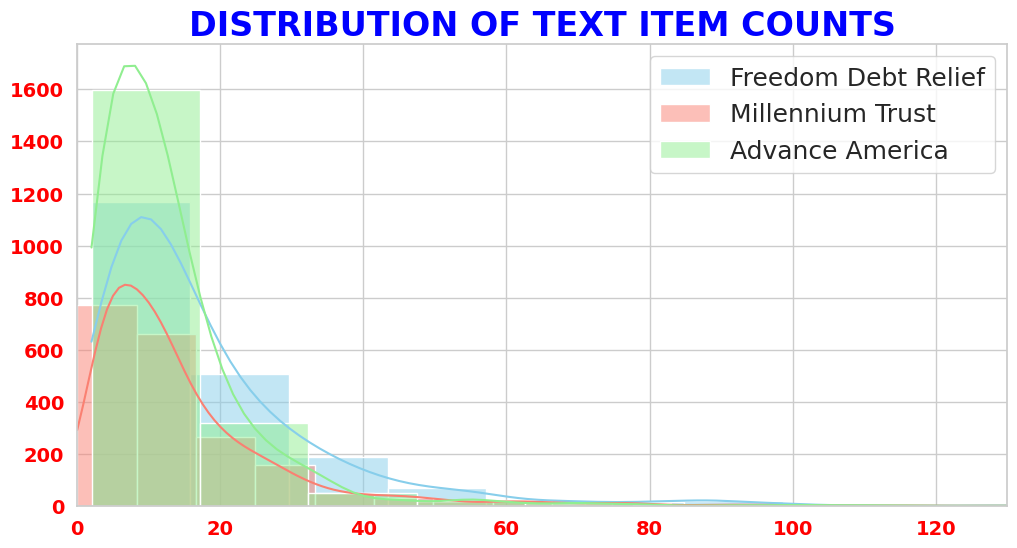

In [85]:
# Set the style of the plot
sns.set(style="whitegrid")

# Plot the distribution of Text_Item_Count for each company
plt.figure(figsize=(12, 6))
sns.histplot(df1['Text_Item_Count'], bins=20, kde=True, color='skyblue', label='Freedom Debt Relief')
sns.histplot(df2['Text_Item_Count'], bins=20, kde=True, color='salmon', label='Millennium Trust')
sns.histplot(df3['Text_Item_Count'], bins=20, kde=True, color='lightgreen', label='Advance America')

# Set title
plt.title('DISTRIBUTION OF TEXT ITEM COUNTS', fontsize=24, fontweight='bold', color='blue')

# Set maximum x-axis limit
plt.xlim(0, 130)

# Hide x and y labels
plt.xlabel('')
plt.ylabel('')

# Customize x and y ticks
plt.xticks(fontsize=14, fontweight='bold', color='red')
plt.yticks(fontsize=14, fontweight='bold', color='red')

# Show legend
plt.legend(fontsize=18)

# Show the plot
plt.show()

## WORDCLOUDS

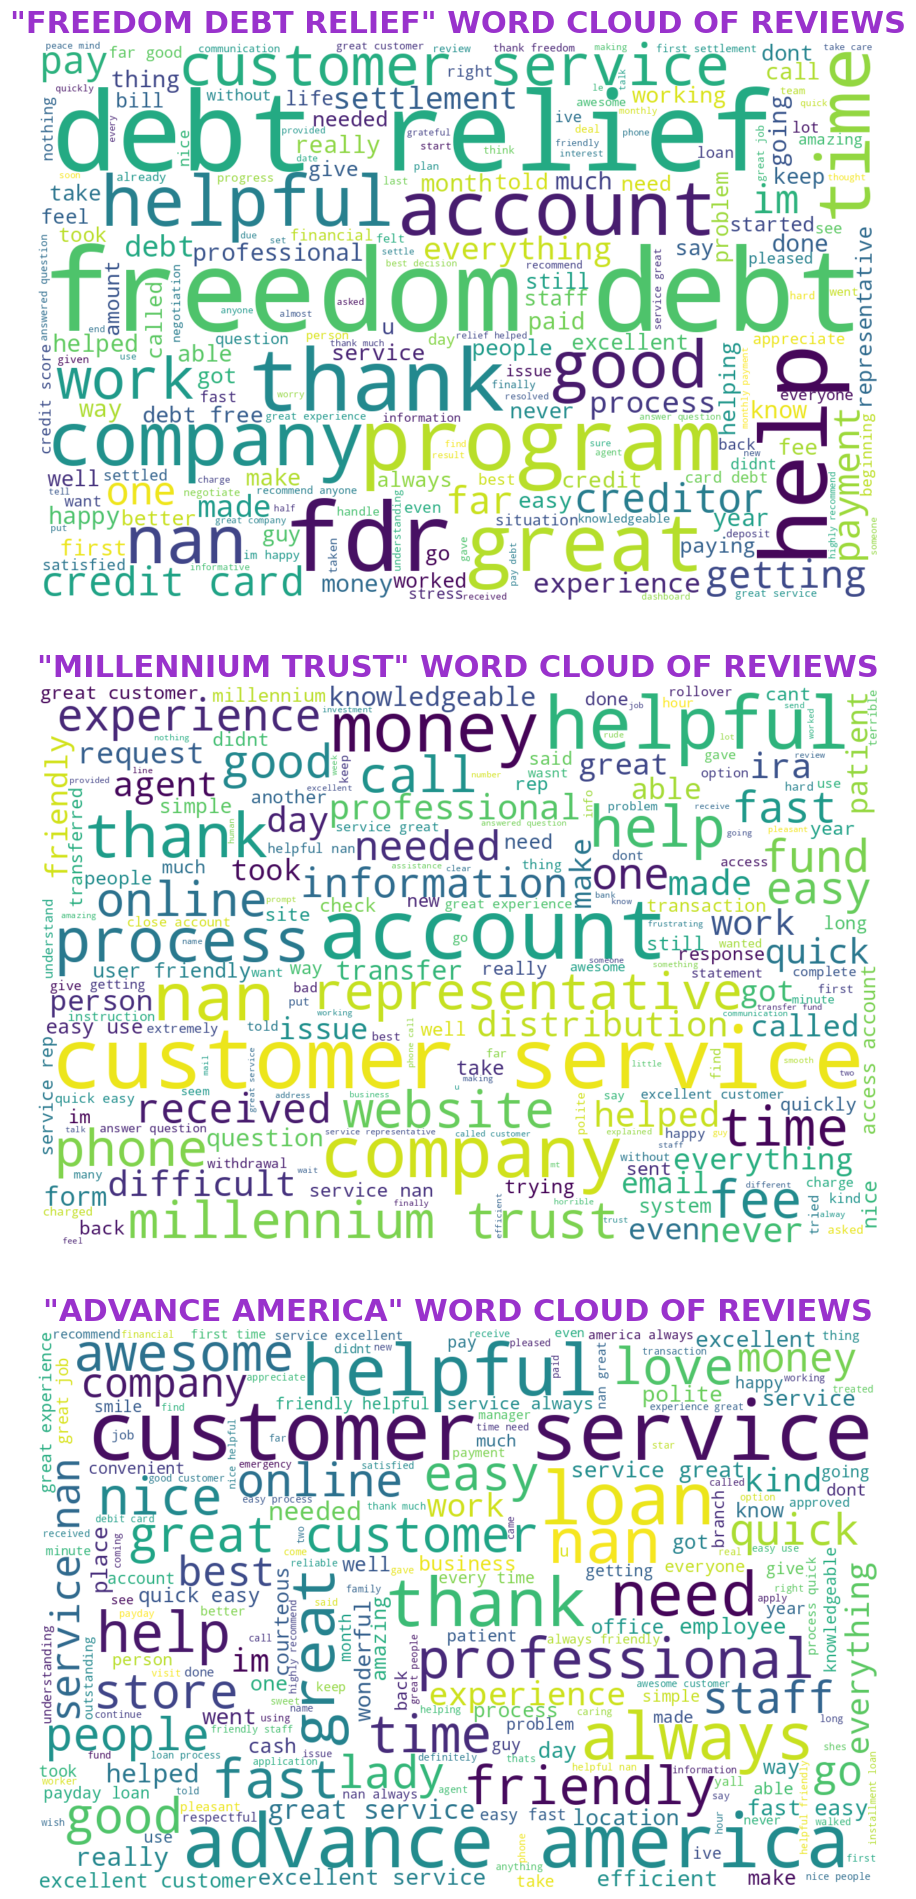

In [86]:
# Function to generate and display word cloud with a light color background
def generate_and_display_wordcloud(data, title, vertical_gap, ax):
    # Generate the word cloud with a light color background
    wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(' '.join(data.dropna()))

    # Sort the word cloud in descending order
    sorted_wordcloud = dict(sorted(wordcloud.words_.items(), key=lambda item: item[1], reverse=True))

    # Get the top 30 results
    top_30 = dict(list(sorted_wordcloud.items())[:50])

    # Set the subplot's title
    ax.set_title(title, fontsize=22, fontweight='bold', color='darkorchid')

    # Add top and bottom gaps between word clouds
    plt.subplots_adjust(hspace=vertical_gap)

    # Display the word cloud on the subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

# Create subplots for the three DataFrames
fig, axs = plt.subplots(3, 1, figsize=(12, 24))

# Apply the function to your DataFrames with subplots
generate_and_display_wordcloud(df1['Cleaned_Reviews'], '"FREEDOM DEBT RELIEF" WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[0])
generate_and_display_wordcloud(df2['Cleaned_Reviews'], '"MILLENNIUM TRUST" WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[1])
generate_and_display_wordcloud(df3['Cleaned_Reviews'], '"ADVANCE AMERICA" WORD CLOUD OF REVIEWS', vertical_gap=0.15, ax=axs[2])

# Show the subplots
plt.show()


## MOST COMMON WORDS

<ipython-input-87-450c414b1f35>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_word_counts, y=top_words, palette=color_map, order=top_words, ax=ax)
<ipython-input-87-450c414b1f35>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_word_counts, y=top_words, palette=color_map, order=top_words, ax=ax)
<ipython-input-87-450c414b1f35>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_word_counts, y=top_words, palette=color_map, order=top_words, ax=ax)
<ipython-input-87-450c414b1f35>:68: UserWarning: This f

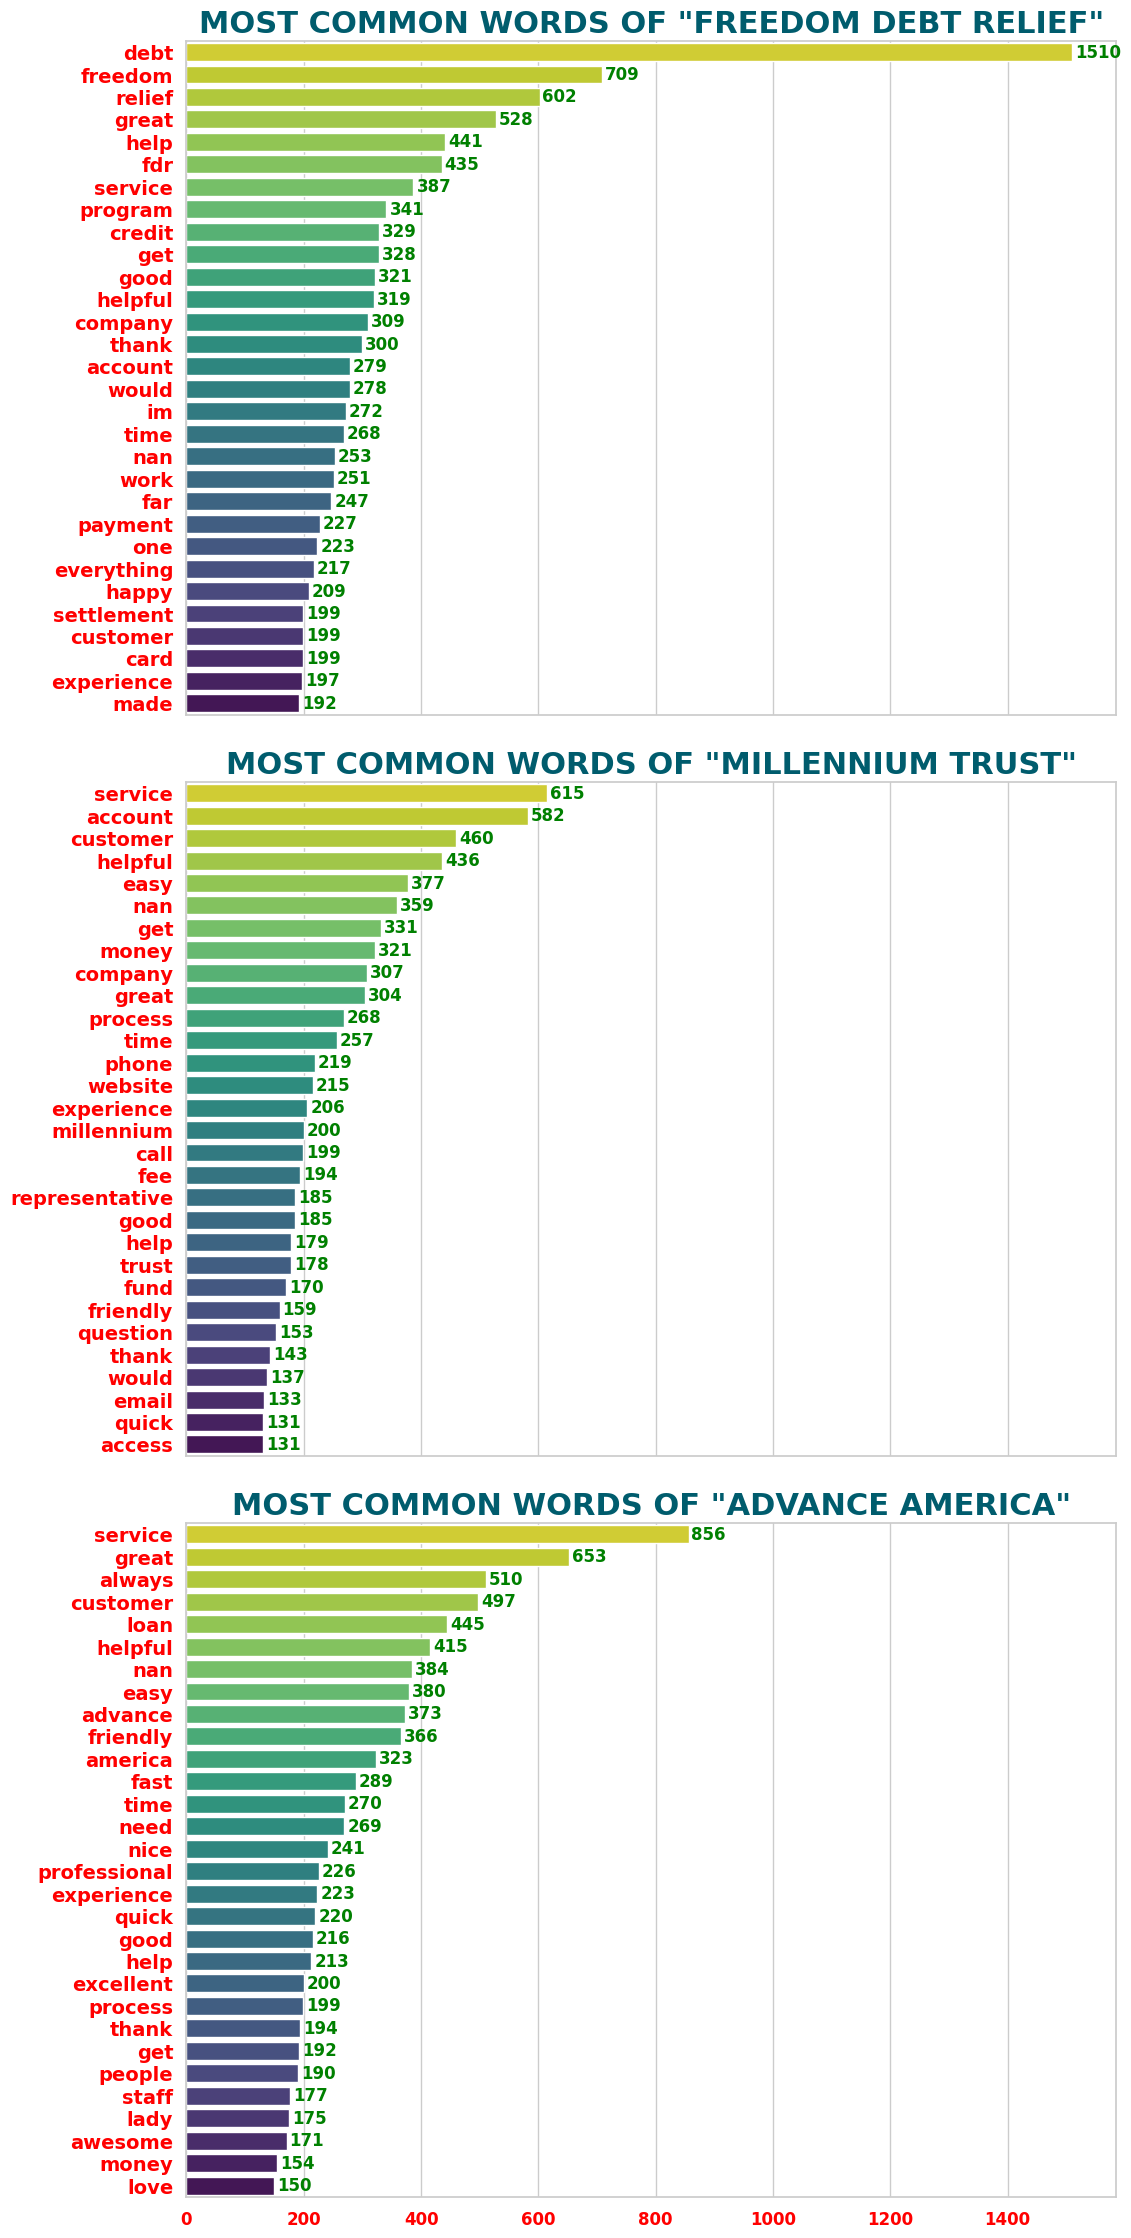

In [87]:
# Function to calculate word counts, display the top 30 words, and create a bar chart with gradient colors
def calculate_display_and_chart_word_counts(data, title, ax, top_n=30):
    # Concatenate and split the text, handling NaN values
    all_words = ' '.join(str(text) for text in data if pd.notna(text)).split()

    # Count the occurrences of each word
    word_counts = Counter(all_words)

    # Sort the word counts in descending order
    sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

    # Create a DataFrame for the first 30 most common words
    word_counts_df = pd.DataFrame(list(sorted_word_counts.items()), columns=['Word', 'Count'])

    # Create a horizontal bar chart with gradient colors for the top 30 words
    top_words = list(sorted_word_counts.keys())[:top_n][::-1]  # Reverse the order
    top_word_counts = list(sorted_word_counts.values())[:top_n][::-1]  # Reverse the order

    # Create a color map with gradient colors
    color_map = sns.color_palette("viridis", n_colors=top_n)

    # Add spacing between bars by adjusting the width
    bar_width = 0.8
    bars = sns.barplot(x=top_word_counts, y=top_words, palette=color_map, order=top_words, ax=ax)



    # Add data values on each bar with custom font size, weight, and color
    for bar, count in zip(bars.patches, top_word_counts):
        ax.text(bar.get_width() + 5, bar.get_y() + bar_width / 2, str(count),
                va='center', fontsize=12, fontweight='bold', color='green')

    # Set axis labels and invert the y-axis for better readability
    ax.invert_yaxis()

    # Add a title with specified properties
    ax.set_title(f'MOST COMMON WORDS OF {title}', fontsize=22, fontweight='bold', color='#005c6d')

    # Customize xticks and yticks
    ax.tick_params(axis='both', which='major', labelsize=12, color='red', width=4, length=6)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Create subplots for the three DataFrames in a single column with three rows, add more gap between subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 28), sharex=True, gridspec_kw={'hspace': 0.1})

# Apply the function to your DataFrames with subplots
calculate_display_and_chart_word_counts(df1['Cleaned_Reviews'], '"FREEDOM DEBT RELIEF"', axs[0])
calculate_display_and_chart_word_counts(df2['Cleaned_Reviews'], '"MILLENNIUM TRUST"', axs[1])
calculate_display_and_chart_word_counts(df3['Cleaned_Reviews'], '"ADVANCE AMERICA"', axs[2])

# Customize yticks and yticklabels for each subplot separately
for ax in axs:
    yticks = ax.get_yticks()
    yticklabels = ax.get_yticklabels()
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels, fontsize=14, color='red', weight='bold')


# Customize xticks for all subplots
for ax in axs:
    ax.tick_params(axis='x', which='major', labelsize=12, color='red', width=4, length=6)

# Customize xticks for the entire figure
plt.xticks(fontsize=12, color='red', weight='bold')

# Show the subplots
plt.tight_layout()
plt.show()


# SENTIMENT ANALYSIS

In [88]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Assume you have DataFrames df1, df2, df3 for each company

# Function for Sentiment Analysis using VADER Sentiment Analysis
def analyze_sentiment_vader(processed_content):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(processed_content)
    return sentiment_scores

# Function to assign sentiment scores
def assign_sentiment_score(sentiment):
    compound_score = sentiment['compound']

    if compound_score >= 0.5:
        return 'positive'
    elif 0.1 <= compound_score < 0.5:
        return 'semipositive'
    elif -0.1 <= compound_score < 0.1:
        return 'neutral'
    elif -0.5 <= compound_score < -0.1:
        return 'seminegative'
    else:
        return 'negative'

# Function to assign numeric sentiment scores
def assign_numeric_sentiment_score(sentiment):
    compound_score = sentiment['compound']

    if compound_score >= 0.5:
        return 5
    elif 0.1 <= compound_score < 0.5:
        return 4
    elif -0.1 <= compound_score < 0.1:
        return 3
    elif -0.5 <= compound_score < -0.1:
        return 2
    else:
        return 1

# Function to compare given and calculated ratings
def compare_ratings(given_rating, calculated_rating):
    # Calculate the difference between given and calculated ratings
    rating_difference = given_rating - calculated_rating
    return rating_difference

# Apply sentiment analysis to the 'Review' column for each company's DataFrame
for i, df in enumerate([df1, df2, df3], start=1):
    company_label = chr(ord('A') + i - 1)  # Convert 1, 2, 3 to A, B, C

    # Using VADER Sentiment Analysis
    analyzer = SentimentIntensityAnalyzer()
    df[f'Sentiment_Scores_VADER_{company_label}'] = df['Reviews'].apply(lambda x: analyze_sentiment_vader(str(x)) if pd.notna(x) else {'compound': 0, 'neg': 0, 'neu': 0, 'pos': 0})

    # Assign sentiment scores - String labels
    df[f'Sentiment_Label_{company_label}'] = df[f'Sentiment_Scores_VADER_{company_label}'].apply(assign_sentiment_score)

    # Assign sentiment scores - Numeric scores
    df[f'Sentiment_Score_Numeric_{company_label}'] = df[f'Sentiment_Scores_VADER_{company_label}'].apply(assign_numeric_sentiment_score)

    # Calculate and print the difference between given and calculated ratings
    given_ratings = df['Rating']
    calculated_ratings = df[f'Sentiment_Scores_VADER_{company_label}'].apply(assign_numeric_sentiment_score)

    rating_difference = compare_ratings(given_ratings, calculated_ratings)

    # Add the rating_difference column to the DataFrame
    df[f'Rating_Difference_{company_label}'] = rating_difference

# Print the modified DataFrames
for i, df in enumerate([df1, df2, df3], start=1):
    company_label = chr(ord('A') + i - 1)  # Convert 1, 2, 3 to A, B, C
    print(f"\nModified DataFrame for Company {company_label}:")
    print(df)



Modified DataFrame for Company A:
        Year Experience Date Review Date  Reply Date  Exp to Review  \
0     2021.0      2021-08-26  2021-08-26  2021-08-27              0   
1     2022.0      2022-09-29  2022-09-29  2022-09-29              0   
2     2021.0      2021-06-04  2021-06-04  2021-06-05              0   
3     2023.0      2023-04-25  2023-05-12  2023-05-12             17   
4     2023.0      2022-07-22  2023-04-21  2023-04-21            273   
...      ...             ...         ...         ...            ...   
1995  2023.0      2023-05-09  2023-05-26  2023-05-26             17   
1996  2022.0      2022-09-01  2022-09-01  2022-09-02              0   
1997  2022.0      2022-12-11  2022-12-12  2022-12-12              1   
1998  2022.0      2022-11-18  2022-11-18  2022-11-18              0   
1999  2021.0      2021-02-05  2021-02-05  2021-02-08              0   

      Review to Reply  Rating      Countries  \
0                   1       5  United States   
1               

In [89]:
df1.head().T


,0,1,2,3,4
Year,2021.0,2022.0,2021.0,2023.0,2023.0
Experience Date,2021-08-26,2022-09-29,2021-06-04,2023-04-25,2022-07-22
Review Date,2021-08-26,2022-09-29,2021-06-04,2023-05-12,2023-04-21
Reply Date,2021-08-27,2022-09-29,2021-06-05,2023-05-12,2023-04-21
Exp to Review,0,0,0,17,273
Review to Reply,1,0,1,0,0
Rating,5,5,4,4,5
Countries,United States,United States,United States,United States,United States
Reviews,Freedom Debt Relief helped me reduce my… Freed...,"Please read Freedom debt is an amazing, they ...",So far I cannot complain So far I cannot compl...,Very clear explanation and very… Very clear ex...,FDR is trustworthy FDR is honest and hardworki...
Replies,"Christine, we appreciate you taking the time t...","We love your feedback, Lauren! You are aggress...","Lynn, thank you for taking the time to leave u...","That's amazing, Eric! Thank you for letting al...","You are completely right, Kathleen! Our agents..."


In [90]:
df2.head().T

,0,1,2,3,4
Year,2022.0,2023.0,2023.0,2023.0,2023.0
Experience Date,2022-02-07,2023-07-14,2023-02-02,2023-04-25,2023-01-03
Review Date,2022-02-07,2023-07-15,2023-02-07,2023-05-03,2023-01-15
Reply Date,2022-02-08,2023-07-16,2023-02-07,2023-05-04,2023-01-16
Exp to Review,0,1,5,8,12
Review to Reply,1,1,0,1,1
Rating,4,5,5,5,5
Countries,United States,United States,United States,United States,United States
Reviews,The only issue I have is that it was… The only...,The service was great The service was great. W...,Great customer service nan,My experience was excellent customer… My exper...,Easy to use It was very easy and quick
Replies,We appreciate you taking the time to share you...,We are so happy you had a good experience! Th...,We are so happy you had a good experience! Th...,We aim to please! Thank you for the feedback!,Thank you for the 5 star review! We appreciat...


In [91]:
df3.head().T

,0,1,2,3,4
Year,2021.0,2021.0,2022.0,2021.0,2021.0
Experience Date,2021-09-20,2021-11-10,2022-11-03,2021-11-24,2021-01-24
Review Date,2021-09-20,2021-11-10,2022-11-07,2021-11-24,2021-01-24
Reply Date,2021-09-20,2021-11-11,2022-11-07,2021-11-26,2021-01-25
Exp to Review,0,0,4,0,0
Review to Reply,0,1,0,2,1
Rating,5,5,5,5,4
Countries,United States,United States,United States,United States,United States
Reviews,All I have to say is: All I have to say is:KEE...,Real good service quick and affected… Real goo...,I was greeted kindly and associate… I was gree...,Cindy and Julie were very nice and… Cindy and ...,Would rather have had cash nonetheless… Would ...
Replies,Thank you for your positive review. At Advance...,Thank you for your positive review. At Advance...,Thank you for your positive review. At Advance...,-Thank you for your positive review. At Advanc...,We were so excited to receive this review and ...


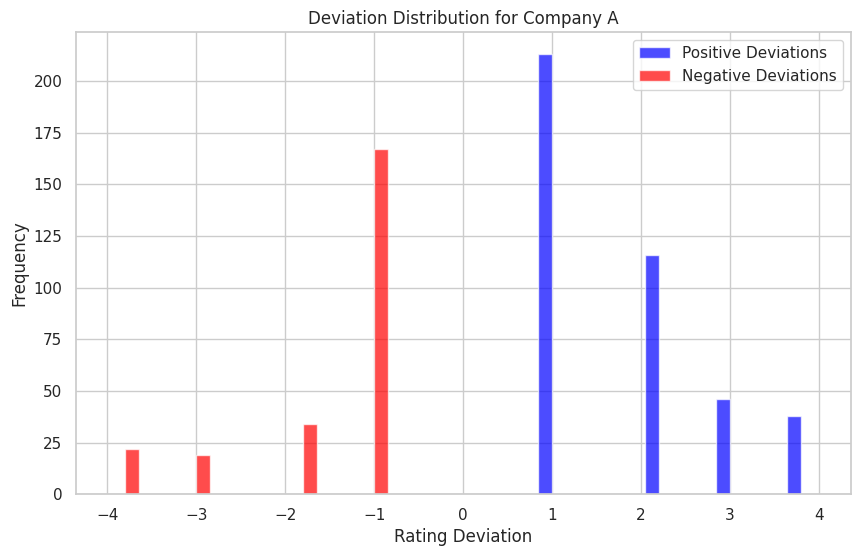

Perfect Matches Count for Company A: 1345
Positive Deviations Count for Company A: 413
Positive Deviations for Company A:
        Year Experience Date Review Date  Reply Date  Exp to Review  \
6     2022.0      2022-12-22  2022-12-23  2022-12-28              1   
7     2023.0      2023-03-09  2023-03-10  2023-03-10              1   
13    2023.0      2022-12-16  2023-07-12  2023-07-13            208   
18    2022.0      2022-09-02  2022-09-02  2022-09-07              0   
24    2021.0      2021-05-03  2021-05-03  2021-05-04              0   
...      ...             ...         ...         ...            ...   
1971  2021.0      2021-06-15  2021-06-15  2021-06-16              0   
1983  2021.0      2021-03-25  2021-03-25  2021-03-25              0   
1987  2022.0      2022-09-07  2022-09-07  2022-09-08              0   
1988  2022.0      2022-09-22  2022-09-22  2022-09-23              0   
1996  2022.0      2022-09-01  2022-09-01  2022-09-02              0   

      Review to Reply  Ra

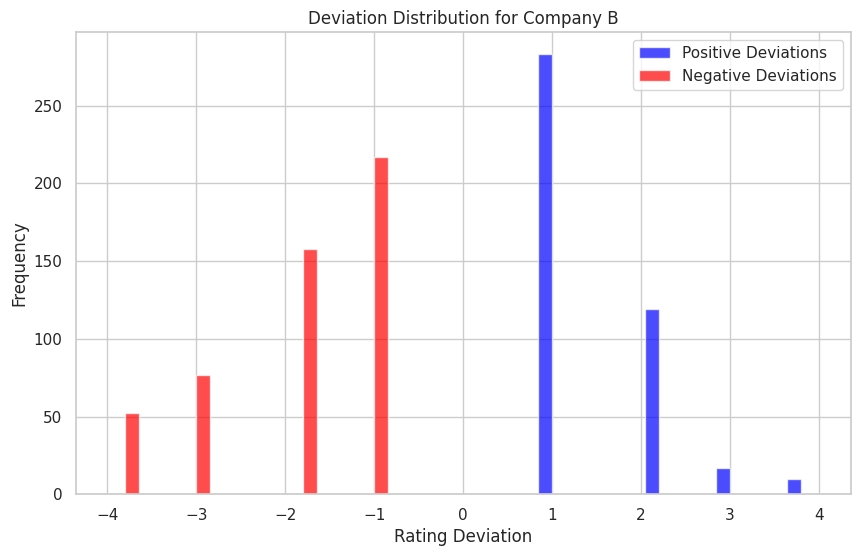

Perfect Matches Count for Company B: 1067
Positive Deviations Count for Company B: 429
Positive Deviations for Company B:
        Year Experience Date Review Date  Reply Date  Exp to Review  \
7     2023.0      2023-02-13  2023-02-13  2023-02-14              0   
13    2022.0      2022-10-09  2022-10-09  2022-10-10              0   
18    2022.0      2022-05-02  2022-05-02  2022-05-03              0   
19    2022.0      2022-03-02  2022-03-02  2022-03-03              0   
30    2021.0      2021-11-16  2021-11-16  2021-11-16              0   
...      ...             ...         ...         ...            ...   
1971  2023.0      2023-03-16  2023-03-17  2023-03-18              1   
1978  2023.0      2023-04-03  2023-04-03  2023-04-04              0   
1980  2023.0      2023-11-02  2023-11-02  2023-11-03              0   
1983  2023.0      2023-10-20  2023-10-20  2023-10-21              0   
1996  2022.0      2022-03-19  2022-03-19  2022-03-20              0   

      Review to Reply  Ra

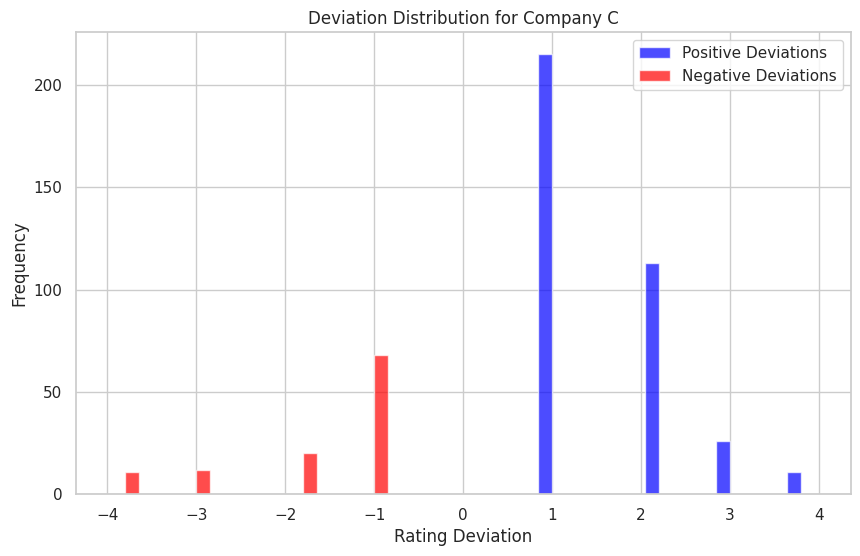

Perfect Matches Count for Company C: 1524
Positive Deviations Count for Company C: 365
Positive Deviations for Company C:
        Year Experience Date Review Date  Reply Date  Exp to Review  \
1     2021.0      2021-11-10  2021-11-10  2021-11-11              0   
7     2023.0      2023-08-02  2023-08-06  2023-08-07              4   
9     2022.0      2022-07-08  2022-07-08  2022-07-08              0   
16    2022.0      2022-01-07  2022-01-07  2022-01-07              0   
24    2023.0      2023-12-03  2023-12-05  2023-12-05              2   
...      ...             ...         ...         ...            ...   
1978  2021.0      2021-07-10  2021-07-10  2021-07-12              0   
1980  2021.0      2021-03-06  2021-03-06  2021-03-06              0   
1981  2022.0      2022-03-15  2022-03-15  2022-03-15              0   
1987  2022.0      2022-12-27  2022-12-30  2022-12-30              3   
1995  2022.0      2022-04-21  2022-04-21  2022-04-22              0   

      Review to Reply  Ra

In [97]:
# Step 1: Calculate Deviation Distribution
def plot_deviation_distribution(df, company_label):
    plt.figure(figsize=(10, 6))

    # Extract positive and negative deviations
    positive_deviations = df[df[f'Rating_Difference_{company_label}'] > 0][f'Rating_Difference_{company_label}']
    negative_deviations = df[df[f'Rating_Difference_{company_label}'] < 0][f'Rating_Difference_{company_label}']

    # Plot side by side bars
    plt.hist([positive_deviations, negative_deviations], bins=20, color=['blue', 'red'], alpha=0.7, label=['Positive Deviations', 'Negative Deviations'])

    plt.title(f'Deviation Distribution for Company {company_label}')
    plt.xlabel('Rating Deviation')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Step 2: Evaluate Perfect Matches
def evaluate_perfect_matches(df, company_label):
    perfect_matches_count = df[df[f'Rating_Difference_{company_label}'] == 0].shape[0]
    print(f'Perfect Matches Count for Company {company_label}: {perfect_matches_count}')

# Step 3: Examine Positive Deviations
def examine_positive_deviations(df, company_label):
    positive_deviations_count = df[df[f'Rating_Difference_{company_label}'] > 0].shape[0]
    print(f'Positive Deviations Count for Company {company_label}: {positive_deviations_count}')
    positive_deviations = df[df[f'Rating_Difference_{company_label}'] > 0]
    print(f'Positive Deviations for Company {company_label}:')
    print(positive_deviations)

# Step 4: Analyze Negative Deviations
def analyze_negative_deviations(df, company_label):
    negative_deviations_count = df[df[f'Rating_Difference_{company_label}'] < 0].shape[0]
    print(f'Negative Deviations Count for Company {company_label}: {negative_deviations_count}')
    negative_deviations = df[df[f'Rating_Difference_{company_label}'] < 0]
    print(f'Negative Deviations for Company {company_label}:')
    print(negative_deviations)

# Step 5: Assess Overall Success
def assess_overall_success(df, company_label):
    perfect_matches_count = df[df[f'Rating_Difference_{company_label}'] == 0].shape[0]
    overall_success = "Success" if perfect_matches_count > 0 else "No Perfect Matches"
    print(f'Overall Success for Company {company_label}: {overall_success}')

# Step 6: Insights and Improvements
def provide_insights_and_suggestions(df, company_label):
    negative_deviations_count = df[df[f'Rating_Difference_{company_label}'] < 0].shape[0]
    if negative_deviations_count > 0:
        print(f'Insights for Company {company_label}: Negative deviations suggest areas for improvement.')
        print(f'Suggestions for Company {company_label}: Explore sentiment analysis models or features for enhancement.')
    else:
        print(f'Insights for Company {company_label}: The sentiment analysis aligns well with given ratings.')
        print(f'Suggestions for Company {company_label}: Continue monitoring and refining the process for consistency.')

# Apply the functions to each DataFrame
for i, df in enumerate([df1, df2, df3], start=1):
    company_label = chr(ord('A') + i - 1)

    # Step 1
    plot_deviation_distribution(df, company_label)

    # Step 2
    evaluate_perfect_matches(df, company_label)

    # Step 3
    examine_positive_deviations(df, company_label)

    # Step 4
    analyze_negative_deviations(df, company_label)

    # Step 5
    assess_overall_success(df, company_label)

    # Step 6
    provide_insights_and_suggestions(df, company_label)


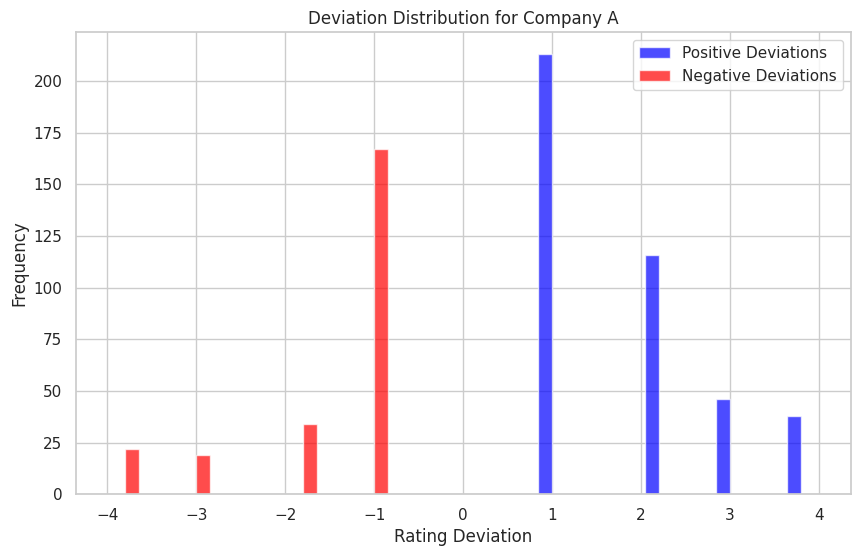

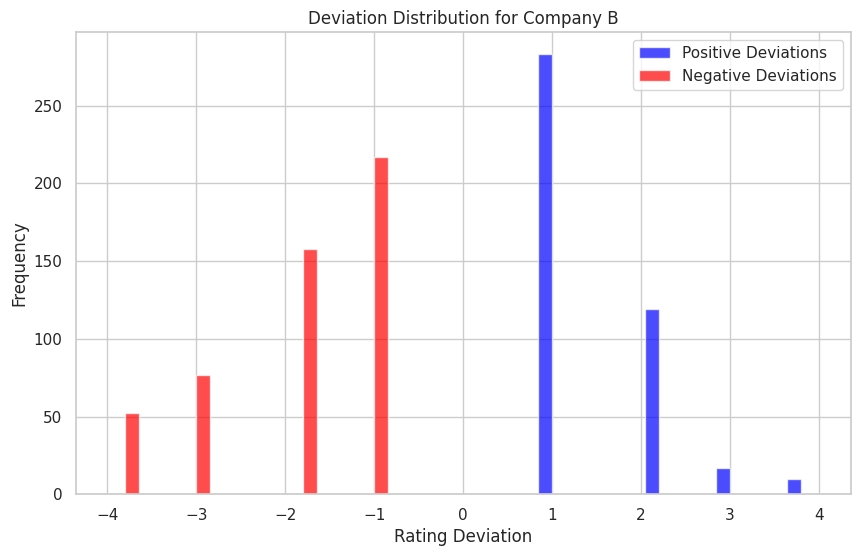

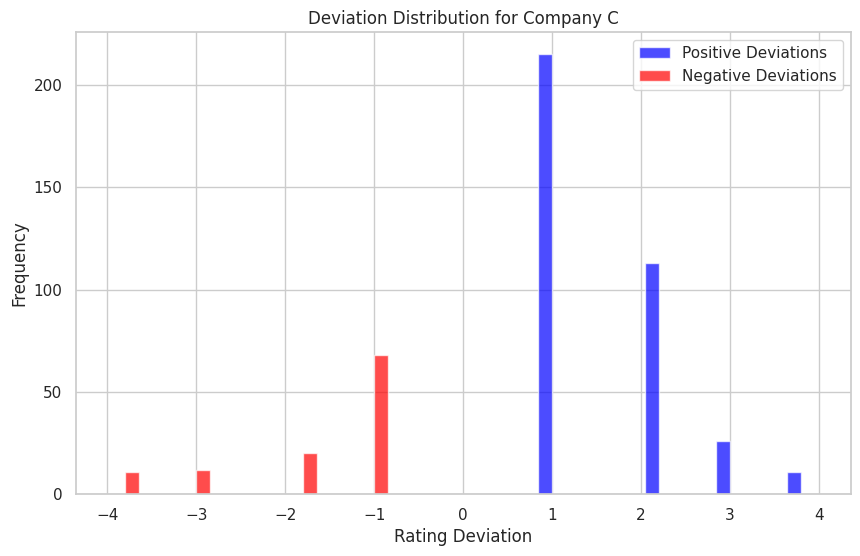

In [98]:
def plot_deviation_distribution(df, company_label):
    plt.figure(figsize=(10, 6))

    # Extract positive and negative deviations
    positive_deviations = df[df[f'Rating_Difference_{company_label}'] > 0][f'Rating_Difference_{company_label}']
    negative_deviations = df[df[f'Rating_Difference_{company_label}'] < 0][f'Rating_Difference_{company_label}']

    # Plot side by side bars
    plt.hist([positive_deviations, negative_deviations], bins=20, color=['blue', 'red'], alpha=0.7, label=['Positive Deviations', 'Negative Deviations'])

    plt.title(f'Deviation Distribution for Company {company_label}')
    plt.xlabel('Rating Deviation')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# Apply the functions to each DataFrame
for i, df in enumerate([df1, df2, df3], start=1):
    company_label = chr(ord('A') + i - 1)

    plot_deviation_distribution(df, company_label)




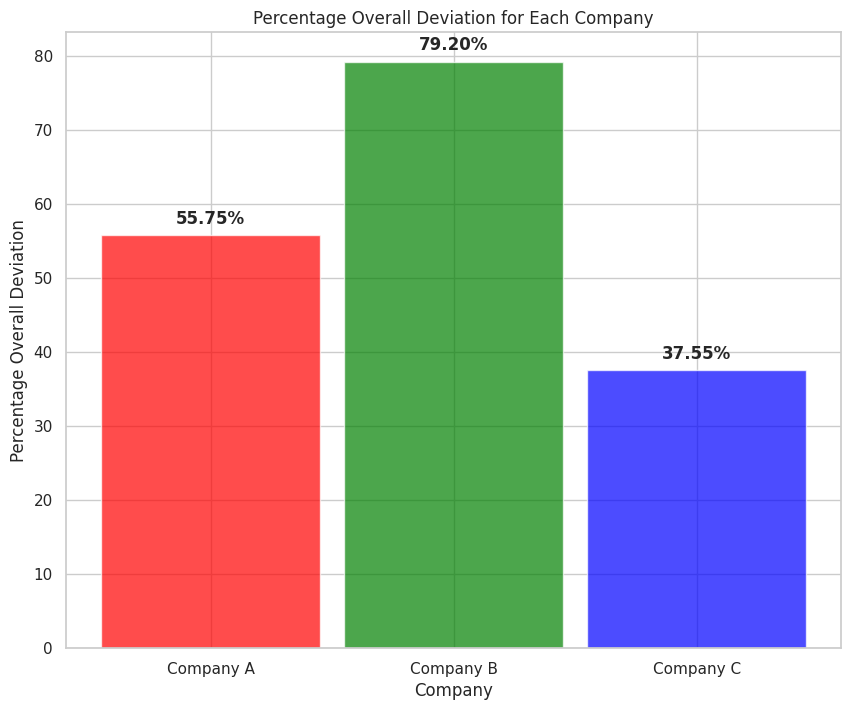

In [108]:
def calculate_percentage_deviation(df, company_label):
    total_deviations = df[f'Rating_Difference_{company_label}'].abs().sum()
    total_datapoints = len(df)
    percentage_deviation = (total_deviations / total_datapoints) * 100

    return percentage_deviation

# Lists to store data for visualization
labels = []
percentage_deviations = []

# Apply the function for each DataFrame
for i, df in enumerate([df1, df2, df3], start=1):
    company_label = chr(ord('A') + i - 1)
    percentage_deviation = calculate_percentage_deviation(df, company_label)

    labels.append(f'Company {company_label}')
    percentage_deviations.append(percentage_deviation)

# Visualization
plt.figure(figsize=(10, 8))

bar_width = 0.9
index = np.arange(len(labels))

colors = ['red', 'green', 'blue']  # Add more colors as needed

plt.bar(index, percentage_deviations, color=colors, alpha=0.7, width=bar_width, align='center')

plt.xlabel('Company')
plt.ylabel('Percentage Overall Deviation')
plt.title('Percentage Overall Deviation for Each Company')

# Adding labels to each bar
for i, value in enumerate(percentage_deviations):
    plt.text(index[i], value + 1, f'{value:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.xticks(index, labels)
plt.show()
